Veri işleme ve analizi için pandas kütüphanesi kullanılacaktır. Pandas kütüphanesi pd rumuzu ile kısaltılmıştır.

In [1]:
import pandas as pd

Verilerimiz Google Drive (bulut) üzerinde olduğu için Google Colab ile Google Drive arasında bağlantı kurulacaktır.

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Google Drive içinde Colab Notebooks klasörünün içinde TDDI2022 isimli klasörde verilerimizi sakladığımız için bu klasöre erişilecektir.

***NOT:*** Bu klasörü daha önce oluşturmadıysanız %md TDDI2022 komutu veya Google Drive Ara Yüzü ile klasörü oluşturunuz!

In [ ]:
%cd drive/
%cd MyDrive/
%cd Colab Notebooks/
# Google Drive içinde Colab Notebooks klasörünün içinde TDDI2022 diye bir klasör oluşturduktan sonra o klasöre erişiyoruz.
# Bu klasörü daha önce oluşturmadıysanız %md TDDI2022 komutu veya Google Drive Ara Yüzü ile klasörü oluşturunuz!
%cd TDDI2022/

# Klasörün içeriğinin görülmesi için
%ls

TDDI2022 klasöründe bulunan ve proje kapsamında oluşturulan **filmOzetleriVeriKumesi_TURKCE.csv** dosyasının içindeki veriler **veri İskeleti** oluşturmak için pandas ile okunacaktır.

Veri iskeleti oluşturulduktan sonra veri iskeleti ile ilgili bilgi ekrana yazdırılacaktır. Tam özetin yazdırılıp yazdırılmayacağı durumunu *verbose=True* (yazdırılsın) parametresi ile kontrol edilecektir. 

In [4]:
df = pd.read_csv('filmOzetleriVeriKumesi_TURKCE.csv')
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      34886 non-null  int64 
 1   Çıkış Yılı      34886 non-null  int64 
 2   Orijinal İsmi   34886 non-null  object
 3   Yapıldığı Ülke  34886 non-null  object
 4   Yönetmeni       34886 non-null  object
 5   Oyuncu Kadrosu  33464 non-null  object
 6   Türü            34858 non-null  object
 7   Veri Kaynağı    34886 non-null  object
 8   Olay Dizisi     34886 non-null  object
dtypes: int64(2), object(7)
memory usage: 2.4+ MB


Unnamed: 0 isimli sütun / alan proje kapsamında kullanılması zorunlu olan veri içermediği için silinecektir.

In [5]:
df = df.drop(columns='Unnamed: 0')
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Çıkış Yılı      34886 non-null  int64 
 1   Orijinal İsmi   34886 non-null  object
 2   Yapıldığı Ülke  34886 non-null  object
 3   Yönetmeni       34886 non-null  object
 4   Oyuncu Kadrosu  33464 non-null  object
 5   Türü            34858 non-null  object
 6   Veri Kaynağı    34886 non-null  object
 7   Olay Dizisi     34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


Film ararken işe yaramayacak \n \r \\ veya benzer karakterler veri iskeletinden temizlenecektir. 

In [6]:
df = df.replace('  ','')
df = df.replace(' ','')
df = df.replace('.','')
df = df.replace(':','')
df = df.replace('\\','')
df = df.replace('\n','')
df = df.replace('\r','')
df = df.replace('i̇','i')
df = df.replace('ý','ı')

Özellikle olay dizisi orijinal kaynağı wiki olduğu için atıflardan kaynaklı [1] ve [2] gibi girdilere sahiptir. Bunları da temizlememiz gerekmektedir.

In [7]:
df['Olay Dizisi'] = df['Olay Dizisi'].replace('1','')
df['Olay Dizisi'] = df['Olay Dizisi'].replace('2','')
df['Olay Dizisi'] = df['Olay Dizisi'].replace('3','')
df['Olay Dizisi'] = df['Olay Dizisi'].replace('4','')
df['Olay Dizisi'] = df['Olay Dizisi'].replace('5','')
df['Olay Dizisi'] = df['Olay Dizisi'].replace('6','')
df['Olay Dizisi'] = df['Olay Dizisi'].replace('7','')
df['Olay Dizisi'] = df['Olay Dizisi'].replace('8','')
df['Olay Dizisi'] = df['Olay Dizisi'].replace('9','')
df['Olay Dizisi'] = df['Olay Dizisi'].replace('[','')
df['Olay Dizisi'] = df['Olay Dizisi'].replace(']','')

Özetten arama yapmak için istediğimiz özelliklerin olduğu bir film girdisi yapılacaktır.

Örnek girdi "uzayda kovboylar ile kızılderililerin savaşı" olsun ve bu girdiye göre elimizdeki film listesinden film önerisi yapmaya çalışalım. Ayrıca büyük küçük harf ile ilgili farklılıklar yaşamamak için her zaman küçük harf olarak çalışalım.

In [8]:
arananFilmOzeti = 'uzayda kovboylar ile kızılderililerin savaşı'.lower()

Aramayı yapmadan önce arananFilmOzeti içinde gereksiz kelime bırakmayalım.

**Kaynaklar:** 

* https://www.veribilimiokulu.com/natural-language-toolkitnltk/
* https://medium.com/kodcular/do%C4%9Fal-dil-i%CC%87%C5%9Fleme-nedir-uygulamal%C4%B1-%C3%B6rnek-b8eb15af7fd5

In [9]:
# Gereksiz kelimeleri çıkartıyoruz
import nltk
nltk.download('stopwords') # Gereksiz Kelimeler
nltk.download('punkt')     # Noktalama İşaretleri
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
gereksizler = set(stopwords.words('turkish'))
kelimeler = word_tokenize(arananFilmOzeti.lower())
gereksizKelimelerCikarilmisArananFilmOzeti = []
 
for k in kelimeler:
    if k not in gereksizler:
        gereksizKelimelerCikarilmisArananFilmOzeti.append(k)
 
print(gereksizKelimelerCikarilmisArananFilmOzeti)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['uzayda', 'kovboylar', 'kızılderililerin', 'savaşı']


RAM Nedeniyle çökme oluyor df['Olay Dizisi'] alanında temizlik yapmamız gerekiyor.

**Kaynak:** https://practicaldatascience.co.uk/machine-learning/how-to-preprocess-text-for-nlp-in-four-easy-steps

In [18]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
nltk.download('punkt');
from nltk.tokenize import word_tokenize

def simgelestir(sutun):
  tokens = nltk.word_tokenize(sutun)
  kucuktokens = []
  for t in tokens:
    kucuktokens += t.lower()
  kucuktokens = list(set(kucuktokens))
  return [w for w in tokens if w.isalpha()]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
df['simgelestirilmis'] = df.apply(lambda x: simgelestir(x['Olay Dizisi']), axis=1)
df[['Orijinal İsmi', 'simgelestirilmis']].head(3)

,Orijinal İsmi,simgelestirilmis
0,Kansas Saloon Smashers,"[Bir, barmen, bir, salonda, çalışıyor, ve, müş..."
1,Love by the Light of the Moon,"[Güler, yüzle, boyanmış, ay, geceleri, bir, pa..."
2,The Martyred Presidents,"[Bir, dakikadan, biraz, daha, uzun, olan, film..."


In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
def remove_stopwords(simgelestirilmisSutun):
    stops = set(stopwords.words("turkish"))
    return [word for word in simgelestirilmisSutun if not word in stops]

In [22]:
df['sadelestirilmis'] = df.apply(lambda x: remove_stopwords(x['simgelestirilmis']), axis=1)
df[['Orijinal İsmi', 'sadelestirilmis']].head()

,Orijinal İsmi,sadelestirilmis
0,Kansas Saloon Smashers,"[Bir, barmen, bir, salonda, çalışıyor, müşteri..."
1,Love by the Light of the Moon,"[Güler, yüzle, boyanmış, ay, geceleri, bir, pa..."
2,The Martyred Presidents,"[Bir, dakikadan, biraz, uzun, olan, film, iki,..."
3,"Terrible Teddy, the Grizzly King","[Sadece, saniye, süren, iki, çekimden, oluşan,..."
4,Jack and the Beanstalk,"[Klasik, masalın, bilinen, eski, uyarlaması, o..."


In [23]:
def apply_stemming(simgelestirilmisSutun):
    stemmer = PorterStemmer() 
    return [stemmer.stem(word) for word in simgelestirilmisSutun]

In [24]:
df['ozunuBulmus'] = df.apply(lambda x: apply_stemming(x['sadelestirilmis']), axis=1)
df[['Orijinal İsmi', 'ozunuBulmus']].head()

,Orijinal İsmi,ozunuBulmus
0,Kansas Saloon Smashers,"[bir, barmen, bir, salonda, çalışıyor, müşteri..."
1,Love by the Light of the Moon,"[güler, yüzle, boyanmış, ay, geceleri, bir, pa..."
2,The Martyred Presidents,"[bir, dakikadan, biraz, uzun, olan, film, iki,..."
3,"Terrible Teddy, the Grizzly King","[sadec, saniy, süren, iki, çekimden, oluşan, i..."
4,Jack and the Beanstalk,"[klasik, masalın, bilinen, eski, uyarlaması, o..."


In [26]:
def kelimeleriBirlestir(simgelestirilmisSutun):
  simgelestirilmisSutun = list(set(simgelestirilmisSutun))
  return ( " ".join(simgelestirilmisSutun))

In [27]:
df['Ozet'] = df.apply(lambda x: kelimeleriBirlestir(x['ozunuBulmus']), axis=1)
df[['Orijinal İsmi', 'Ozet']].head()

,Orijinal İsmi,Ozet
0,Kansas Saloon Smashers,ortaya poli aynaları yazar servisi çıkmadan de...
1,Love by the Light of the Moon,çift geçen geceleri çitin engellenir şapkasıyl...
2,The Martyred Presidents,atışta film dakikadan suikast ortasında abd ka...
3,"Terrible Teddy, the Grizzly King",ancak sıradan hala düzeltir üzerind görünen ba...
4,Jack and the Beanstalk,ineğini ancak eve film sırığının bulur tırmanı...


In [28]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Çıkış Yılı        34886 non-null  int64 
 1   Orijinal İsmi     34886 non-null  object
 2   Yapıldığı Ülke    34886 non-null  object
 3   Yönetmeni         34886 non-null  object
 4   Oyuncu Kadrosu    33464 non-null  object
 5   Türü              34858 non-null  object
 6   Veri Kaynağı      34886 non-null  object
 7   Olay Dizisi       34886 non-null  object
 8   simgelestirilmis  34886 non-null  object
 9   sadelestirilmis   34886 non-null  object
 10  ozunuBulmus       34886 non-null  object
 11  Ozet              34886 non-null  object
dtypes: int64(1), object(11)
memory usage: 3.2+ MB


In [31]:
df = df.drop(columns=['simgelestirilmis','sadelestirilmis','ozunuBulmus','Olay Dizisi'])
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Çıkış Yılı      34886 non-null  int64 
 1   Orijinal İsmi   34886 non-null  object
 2   Yapıldığı Ülke  34886 non-null  object
 3   Yönetmeni       34886 non-null  object
 4   Oyuncu Kadrosu  33464 non-null  object
 5   Türü            34858 non-null  object
 6   Veri Kaynağı    34886 non-null  object
 7   Ozet            34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


Arama yapmadan önce gerekli TF / IDF matrisini (dizey) oluşturalım.

**Kaynaklar:**

* https://monkeylearn.com/blog/what-is-tf-idf/
* https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download("stopwords")
nltk.download('punkt')
from nltk.corpus import stopwords
aranilacak_tfidfNesnesi = TfidfVectorizer(stop_words=stopwords.words("turkish"))
aranilacak_tfidfDizeyi = aranilacak_tfidfNesnesi.fit_transform(df['Ozet'])
aranilacak_tfidfDizeyi.shape

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(34886, 236473)

In [33]:
aranilacak_tfidfNesnesi.get_feature_names()[5000:5010]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['altındayken',
 'altındaymış',
 'altındaysa',
 'altındır',
 'altınla',
 'altınlar',
 'altınlara',
 'altınlarda',
 'altınlardan',
 'altınlarla']

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(aranilacak_tfidfDizeyi, aranilacak_tfidfDizeyi)
cosine_sim.shape

Yukarıdaki satırda yine RAM çöktü!!!
Ölem ben...

In [10]:
indices = pd.Series(df.index, index=df['Orijinal İsmi']).drop_duplicates()
indices[:10]

Orijinal İsmi
Kansas Saloon Smashers              0
Love by the Light of the Moon       1
The Martyred Presidents             2
Terrible Teddy, the Grizzly King    3
Jack and the Beanstalk              4
Alice in Wonderland                 5
The Great Train Robbery             6
The Suburbanite                     7
The Little Train Robbery            8
The Night Before Christmas          9
dtype: int64

In [ ]:
def tavsiyeVer(filmBasligi, cosine_sim=cosine_sim):
    idx = indices[filmBasligi]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['Orijinal İsmi'].iloc[movie_indices]

Olay Dizilerimiz ile arananFilmOzetinin benzerliği üzerinde çalışmaya başlayabiliriz. Benzerlik araştırması için çeşitli algoritmalar vardır.

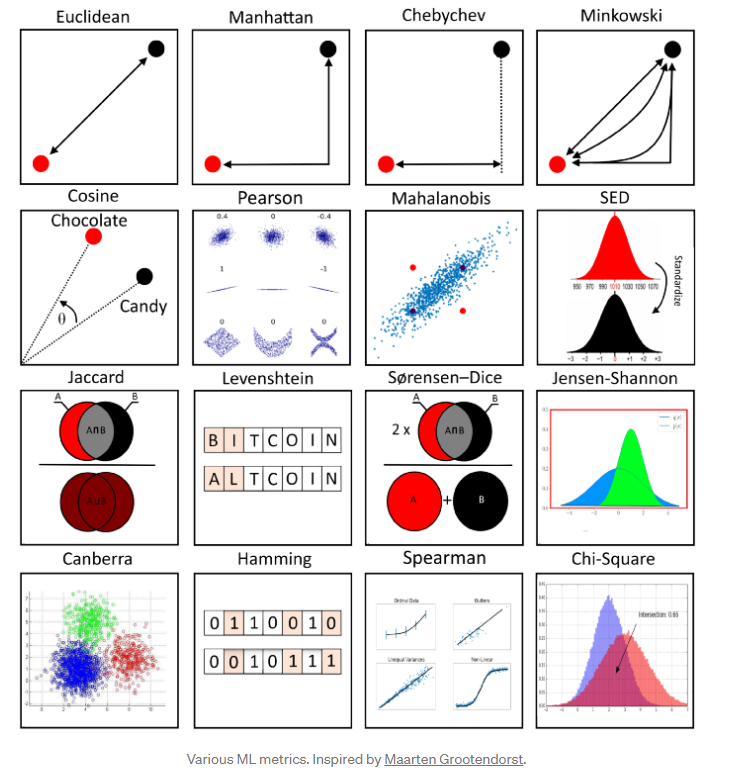

**Kaynaklar:**

* https://goodboychan.github.io/python/datacamp/natural_language_processing/2020/07/17/04-TF-IDF-and-similarity-scores.html
* https://leimao.github.io/blog/Cosine-Similarity-VS-Pearson-Correlation-Coefficient/
* https://towardsdatascience.com/17-types-of-similarity-and-dissimilarity-measures-used-in-data-science-3eb914d2681
* https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa
* https://scikit-learn.org/stable/modules/metrics.html
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html
* https://docs.scipy.org/doc/scipy/reference/spatial.distance.html

**UYARI:** Seçilen yöntemin *seyrek dizeyleri* (sparse matrices) destekleyip desteklemediğini dokümantasyonundan kontrol ediniz.

In [ ]:
# Benzerlik listesinden ilk olarak Euclidean benzerliği deneyelim
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html

from sklearn.metrics.pairwise import linear_kernel
benzerlik = linear_kernel(aranilacak_tfidfDizeyi, aranilacak_tfidfDizeyi)

filmBasliklari = pd.Series(df.index, index=df['Orijinal İsmi']).drop_duplicates()

idx = filmBasliklari[gereksizKelimelerCikarilmisArananFilmOzeti]
sim_scores = list(enumerate(benzerlik[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:11]
movie_indices = [i[0] for i in sim_scores]
print(df['Orijinal İsim'].iloc[movie_indices])

# **Çıkarım:**

- Mevcut tüm RAM kullanıldıktan sonra oturumunuz çöktü mesajı aldık. 12 GB...

**Kaynak:** https://www.datacamp.com/tutorial/recommender-systems-python

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
